# Linear regression assignment

---


1, Load the wine rating data given. 
* A, Drop the unnamed id column, the winery, the tasters name and twitter handle, the title, and the region_1/2
* B, Encode the character length of the description as a vaiable, and drop the original text column
* C, Encode whether the designation is missing or not a one-hot encoded variable, and drop the original column
* D, Encode the most common 20 varieties with one hot encoding, remove the original text column.
* E, Encode the most common 20 country values with one hot encoding, remove the original text column.
* F, Encode the most common 20 province values with one hot encoding, remove the original text column.
* G, Impute missing prices with the mean of the prices.


2, Fit a linear regression to estimate the points given to a wine. Use the full dataset for fitting.
* A, Use statsmodels to do a linear regression, print the summary of the results.
* B, Do the same, with scikit-learn, print the coefficients, and the intercept
* C, Compare the results, are they the same?
* D, Interpret the results,
    are more expensive wines better?
    do they write more about better wines?
    do they like American wines?
    is Rose any good?
    
    
3, Fit a linear regression to estimate the price of a wine.
* A, Interpret the results
    Which countries produce the best value (when controlling for qualty)
    Which country produces the most overpriced wines? (when controlling for qualty)
    Could you guess the most overpiced province surprising?
* B, Predit the prices of wines with your model, plot the true and the precited prices on a scatterplot.
* C, Which wines are the most overpriced, and the best value according to your model. 
    Think about it as an investment, so use the relative difference of the predicted the real price.
    Print the original text description for 1-1
* D, Which wines are so bad, that they should pay you to drink it? 
    Print the details, and the original text description for the worst.
* E, Which wines should be most expensive?
    Print the details, and the original text description.
    
    

4, Add a column which represents whether the wine comes from the top 20 countries (0) or it is a different country (1).
* A, Fit a linear model using statsmodels, and one with scikit-learn predicting the points from the other columns.
* B, Compare the coefficients, are they different? If yes which ones?
* C, Try to find out what is the for the difference here?
    

    



---

### Hints:

* Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
* Comment you code
* Write functions for repetitive tasks!
* Use the pandas package for data loading and handling
* Use matplotlib for plotting or bokeh and plotly for interactive investigation


# <center> Solution </center>

In [1]:
%pylab inline
import pandas as pd
import math
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


## 1)  

In [2]:
df = pd.read_csv('winemag-data-130k-v2.csv.gz', )
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Not sure what one-hot encoding is, but according to [this webpage](http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example), I will do it.

whether the designation is missing or not a one-hot encoded variable -- trying to create a dummy table with those, the kernel died every time, so im gonna use a simple 0-1 col.

Furthermore, first 20? Those data points will not be count, which do not belong to these, or they will have a zero everywhere? I prefer the latter, so lets do it like this.

### A) & B) & C) 

In [3]:
df["carlen"] = [len(str(i)) for i in df.description]
df["des_if"] = df.designation.isnull().astype('int')
df.drop(["Unnamed: 0", "winery", "taster_name", "taster_twitter_handle", "title",
        "region_1", "region_2", "description", "designation"], axis = 1, inplace=True)

### D) & E) & F)  

In [4]:
# http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
# https://docs.python.org/3/howto/sorting.html
# https://stackoverflow.com/questions/33990495/delete-a-column-in-a-pandas-dataframe-if-its-sum-is-less-than-x
to_clear = ['variety', 'country', 'province']

for thing in to_clear:
    df_var = pd.get_dummies(df[thing], prefix=thing[:3],dummy_na=True)
    l = sorted([(col,val) for col, val in df_var.sum().iteritems()],
               key=lambda student: student[1], reverse=True)[20:]
    df_var.drop([ i[0] for i in l], axis = 1, inplace = True)
    df = pd.concat([df,df_var, ],axis=1).drop([thing],axis=1)

### G)

In [5]:
df.price.fillna(df.price.mean(), inplace=True)

In [6]:
df.head()

,points,price,carlen,des_if,var_Bordeaux-style Red Blend,var_Cabernet Sauvignon,var_Chardonnay,var_Malbec,var_Merlot,var_Nebbiolo,...,pro_Oregon,pro_Piedmont,pro_Provence,pro_Sicily & Sardinia,pro_South Australia,pro_Southern Italy,pro_Southwest France,pro_Tuscany,pro_Veneto,pro_Washington
0,87,35.363389,172,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,87,15.000000,227,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87,14.000000,186,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,87,13.000000,199,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,87,65.000000,249,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# 2)

### A)

Maybe specifying that our endogenous variable is the point, would have helped a lot.

In [7]:
results = OLS(df.points, df.drop("points", axis = 1), hasconst=True).fit() 

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                      -3.169
Model:                            OLS   Adj. R-squared:                 -3.171
Method:                 Least Squares   F-statistic:                    -1593.
Date:                Mon, 07 Oct 2019   Prob (F-statistic):               1.00
Time:                        12:42:28   Log-Likelihood:            -4.2169e+05
No. Observations:              129971   AIC:                         8.435e+05
Df Residuals:                  129908   BIC:                         8.441e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
price                            0.0151      0.000     32.064      0.000       0.014       0.016
carlen                           0.0497      0.000    186.064      0.000       0.049       0.050
des_if                           0.4465      0.040     11.062      0.000       0.367       0.526
var_Bordeaux-style Red Blend     0.4452      0.114      3.897      0.000       0.221       0.669
var_Cabernet Sauvignon           1.3157      0.079     16.594      0.000       1.160       1.471
var_Chardonnay                   2.0392      0.075     27.276      0.000       1.893       2.186
var_Malbec                       1.5516      0.146     10.621      0.000       1.265       1.838
var_Merlot                       1.3799      0.120     11.485      0.000       1.144       1.615
var_Nebbiolo                     1.3147      0.208      6.321      0.000       0.907       1.722
var_Pinot Gris                   2.4642      0.175     14.049      0.000       2.120       2.808
var_Pinot Noir                   1.7012      0.075     22.712      0.000       1.554       1.848
var_Portuguese Red               0.4318      0.166      2.594      0.009       0.106       0.758
var_Red Blend                    1.0293      0.079     13.013      0.000       0.874       1.184
var_Rhône-style Red Blend        0.2795      0.174      1.606      0.108      -0.062       0.620
var_Riesling                     1.9667      0.115     17.161      0.000       1.742       2.191
var_Rosé                         0.9571      0.125      7.648      0.000       0.712       1.202
var_Sangiovese                   0.3419      0.148      2.313      0.021       0.052       0.632
var_Sauvignon Blanc              1.8905      0.102     18.544      0.000       1.691       2.090
var_Sparkling Blend              3.9419      0.142     27.772      0.000       3.664       4.220
var_Syrah                        1.5042      0.107     14.073      0.000       1.295       1.714
var_Tempranillo                  0.8165      0.167      4.898      0.000       0.490       1.143
var_White Blend                  2.2288      0.133     16.706      0.000       1.967       2.490
var_Zinfandel                    1.3734      0.130     10.527      0.000       1.118       1.629
cou_Argentina                   72.4098      0.280    259.041      0.000      71.862      72.958
cou_Australia                   73.7990      0.212    348.449      0.000      73.384      74.214
cou_Austria                     76.4790      0.128    598.518      0.000      76.229      76.729
cou_Bulgaria                    75.3348      0.528    142.793      0.000      74.301      76.369
cou_Canada                      74.8943      0.395    189.719      0.000      74.121      75.668
cou_Chile                       72.2950      0.120    600.654      0.000    

### B)

In [9]:
r = LinearRegression().fit(df.drop('points', axis = 1), df.points)

In [10]:

for i,j in zip(df.drop('points', axis = 1).columns,r.coef_):
    print(i,j)
r.intercept_, 

price 0.017480559033599317
carlen 0.02324727412859711
des_if -0.56839839461048
var_Bordeaux-style Red Blend -0.07372763090538992
var_Cabernet Sauvignon 0.06075534514958725
var_Chardonnay 0.2402247260809376
var_Malbec 0.507463268830922
var_Merlot -0.47387566091653743
var_Nebbiolo 1.1304328154773244
var_Pinot Gris 0.48181668246099085
var_Pinot Noir 0.43623990802823875
var_Portuguese Red 0.5592036518602863
var_Red Blend -0.4795748408360192
var_Rhône-style Red Blend -0.09970064896716885
var_Riesling 0.6259697712501409
var_Rosé -0.9814994241302669
var_Sangiovese -0.6931246093929799
var_Sauvignon Blanc -0.10539969166660398
var_Sparkling Blend 0.016622886065534713
var_Syrah 0.47602863645477606
var_Tempranillo -0.18360696521732484
var_White Blend -0.78731764752564
var_Zinfandel -0.32074236738263634
cou_Argentina -1.4873434386060542
cou_Australia 0.30683552585528134
cou_Austria 2.326694517346896
cou_Bulgaria 1.3646410865906857
cou_Canada 1.4079253250975419
cou_Chile -1.1302927141080907
cou_Fran

(81.432836789747,)

In [11]:
results.params

price                            0.015118
carlen                           0.049691
des_if                           0.446516
var_Bordeaux-style Red Blend     0.445195
var_Cabernet Sauvignon           1.315651
var_Chardonnay                   2.039249
var_Malbec                       1.551583
var_Merlot                       1.379885
var_Nebbiolo                     1.314680
var_Pinot Gris                   2.464182
var_Pinot Noir                   1.701151
var_Portuguese Red               0.431798
var_Red Blend                    1.029337
var_Rhône-style Red Blend        0.279472
var_Riesling                     1.966716
var_Rosé                         0.957090
var_Sangiovese                   0.341901
var_Sauvignon Blanc              1.890477
var_Sparkling Blend              3.941947
var_Syrah                        1.504154
var_Tempranillo                  0.816520
var_White Blend                  2.228788
var_Zinfandel                    1.373420
cou_Argentina                   72

### C)

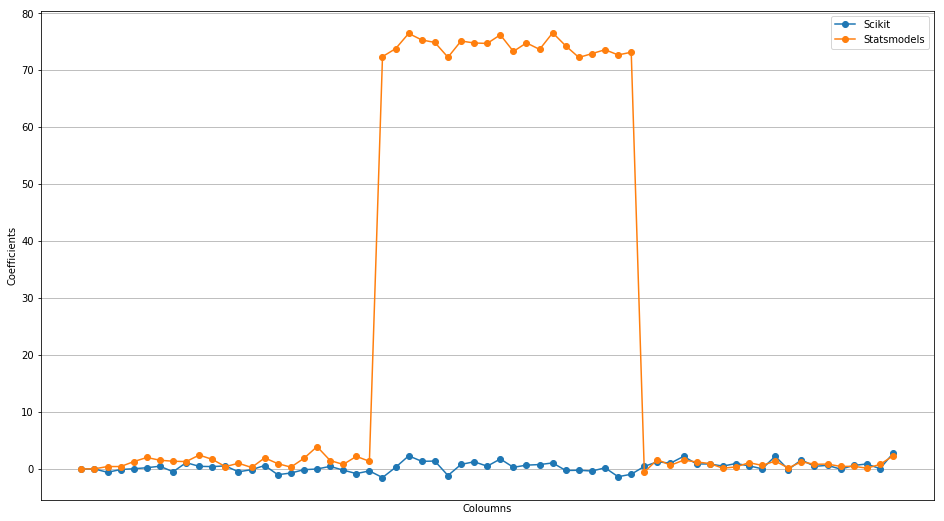

In [12]:
figsize(16,9)
plot(r.coef_, 'o-', label = 'Scikit')
grid()
plot(results.params, 'o-',  label = 'Statsmodels')
xlabel("Coloumns")
ylabel('Coefficients')
legend(loc= 'best')
xticks([]);


The coefficients do show a tendency. The country params are high, and I guess the cause might be the constant. The provances' coefficients are nearly the same for all. 

### D)

- Price-points: no, the coefficients are small. 
- Carlen-points: still, they are below 0.1, so I suppose not.
- America-points: negative and lower coeffs, no they dont.
- Rose-points: nearly 1, or -1, so according to tha latter, no, not good.

# 3)

In [13]:
results_pr = OLS(df.price, df.drop("price", axis = 1), hasconst=True).fit() 

In [14]:
results_pr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     385.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:42:31   Log-Likelihood:            -6.5152e+05
No. Observations:              129971   AIC:                         1.303e+06
Df Residuals:                  129908   BIC:                         1.304e+06
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
points                           0.5194      0.016     32.064      0.000       0.488       0.551
carlen                           0.1075      0.002     61.897      0.000       0.104       0.111
des_if                          -6.0255      0.236    -25.520      0.000      -6.488      -5.563
var_Bordeaux-style Red Blend    14.0891      0.668     21.077      0.000      12.779      15.399
var_Cabernet Sauvignon          16.4943      0.463     35.630      0.000      15.587      17.402
var_Chardonnay                  -2.3728      0.439     -5.400      0.000      -3.234      -1.512
var_Malbec                       6.8317      0.856      7.977      0.000       5.153       8.510
var_Merlot                       2.5811      0.705      3.664      0.000       1.200       3.962
var_Nebbiolo                    25.4809      1.217     20.936      0.000      23.095      27.866
var_Pinot Gris                  -5.2985      1.029     -5.150      0.000      -7.315      -3.282
var_Pinot Noir                   8.7854      0.439     20.003      0.000       7.925       9.646
var_Portuguese Red              -5.7653      0.976     -5.910      0.000      -7.677      -3.853
var_Red Blend                   -0.2976      0.464     -0.641      0.521      -1.207       0.612
var_Rhône-style Red Blend       -0.4077      1.020     -0.400      0.689      -2.407       1.591
var_Riesling                    -3.5125      0.672     -5.224      0.000      -4.830      -2.195
var_Rosé                        -7.2240      0.733     -9.850      0.000      -8.662      -5.787
var_Sangiovese                   2.5001      0.866      2.885      0.004       0.802       4.198
var_Sauvignon Blanc             -5.6764      0.598     -9.491      0.000      -6.849      -4.504
var_Sparkling Blend             -2.5026      0.834     -2.999      0.003      -4.138      -0.867
var_Syrah                        6.1052      0.627      9.742      0.000       4.877       7.334
var_Tempranillo                  0.6507      0.977      0.666      0.505      -1.264       2.566
var_White Blend                 -7.6400      0.783     -9.763      0.000      -9.174      -6.106
var_Zinfandel                   -4.1458      0.765     -5.420      0.000      -5.645      -2.646
cou_Argentina                  -52.0658      2.012    -25.872      0.000     -56.010     -48.121
cou_Australia                  -40.8771      1.723    -23.726      0.000     -44.254     -37.500
cou_Austria                    -40.2290      1.447    -27.792      0.000     -43.066     -37.392
cou_Bulgaria                   -55.3552      3.323    -16.661      0.000     -61.867     -48.843
cou_Canada                     -37.2051      2.613    -14.240      0.000     -42.326     -32.084
cou_Chile                      -53.4349      1.363    -39.203      0.000    

In [15]:
r_pr = LinearRegression().fit(df.drop('price', axis = 1), df.price)

In [16]:

for i,j in zip(df.drop('price', axis = 1).columns,r_pr.coef_):
    print(i,j)
r_pr.intercept_, 

points 4.438166820487214
carlen 0.022984232630743062
des_if -2.775025640809776
var_Bordeaux-style Red Blend 13.682901494559193
var_Cabernet Sauvignon 15.805401055715016
var_Chardonnay -2.132050399464145
var_Malbec 4.93704528043334
var_Merlot 5.3284163457024665
var_Nebbiolo 19.318335979093135
var_Pinot Gris -5.702760574863802
var_Pinot Noir 7.160371645495376
var_Portuguese Red -7.643296850229765
var_Red Blend 2.478946058400492
var_Rhône-style Red Blend 0.23115173018448165
var_Riesling -4.977923499881853
var_Rosé -1.7294641709858218
var_Sangiovese 5.654455542500449
var_Sauvignon Blanc -3.723641386490737
var_Sparkling Blend -0.15826299532135302
var_Syrah 4.377039838445411
var_Tempranillo 1.900143274020914
var_White Blend -2.2709872098731787
var_Zinfandel -1.62084218146975
cou_Argentina -0.4623398402788501
cou_Australia 2.6104931778626392
cou_Austria -4.400769374898045
cou_Bulgaria -14.759181395028476
cou_Canada 1.6651030983025081
cou_Chile -3.41574012585127
cou_France 0.8182002598886129
c

(-368.43915763293705,)

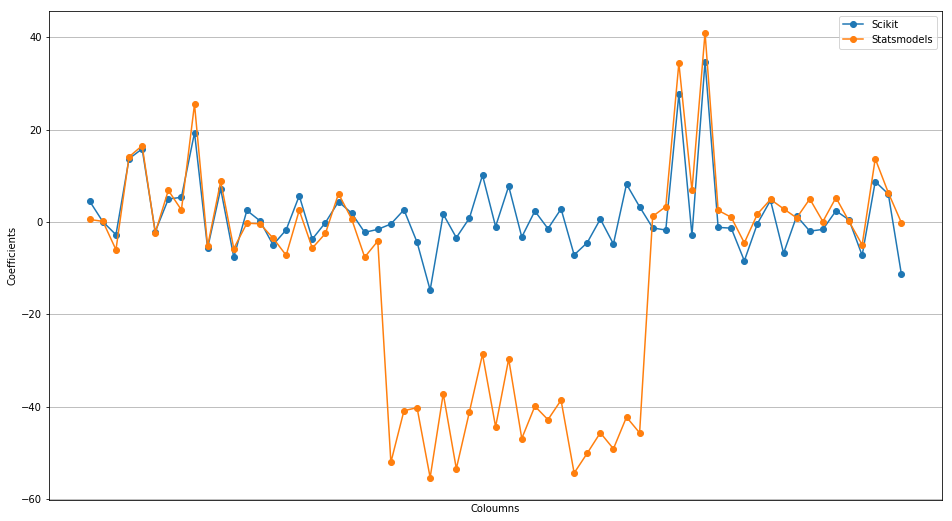

In [17]:
figsize(16,9)
plot(r_pr.coef_, 'o-', label = 'Scikit')
grid()
plot(results_pr.params, 'o-',  label = 'Statsmodels')
xlabel("Coloumns")
ylabel('Coefficients')
legend(loc= 'best')
xticks([]);


### A)

Clearly, tendecy is visible here, except for the countries, where they differ in a constant.

In [18]:
max_, min_ = 0,0
for i,j in zip(df.drop('price', axis = 1).columns,r_pr.coef_):
    if i[:3]=='cou':
        if j>=max_:
            max_ = j
            mx_n = i
        if j<=min_:
            min_ = j
            mn_n = i

In [19]:
print(f"The best controlling is {mx_n[4:]} with a coeff of {max_}"
    +f"\nthe worst is {mn_n[4:]} with {min_}")

The best controlling is Germany with a coeff of 10.107167280541212
the worst is Bulgaria with -14.759181395028476


In [20]:
max_, min_ = 0,0
for i,j in zip(df.drop('price', axis = 1).columns,r_pr.coef_):
    if i[:3]=='pro':
        if j>=max_:
            max_ = j
            mx_n = i
        if j<=min_:
            min_ = j
            mn_n = i

In [21]:
print(f"The best controlling provance is {mx_n[4:]} with a coeff of {max_}"
    +f"\nthe worst is {mn_n[4:]} with {min_}")

The best controlling provance is Champagne with a coeff of 34.71202726116877
the worst is Washington with -11.366413800184944


No, I would not have guessed it.

### B)

In [22]:
price1 = r_pr.predict(df.drop('price', axis = 1))
price2 = results_pr.predict(df.drop('price', axis = 1))

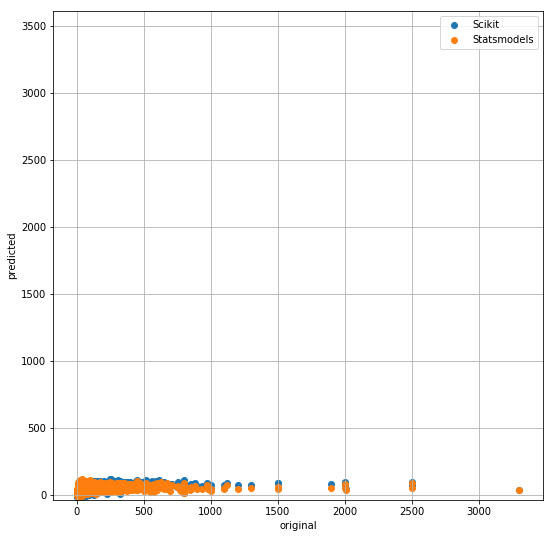

In [23]:
scatter( df.price, price1, label = "Scikit")
scatter(df.price, price2, label = "Statsmodels")
legend(loc="best")
axis('square')
grid()
xlabel('original')
ylabel('predicted');

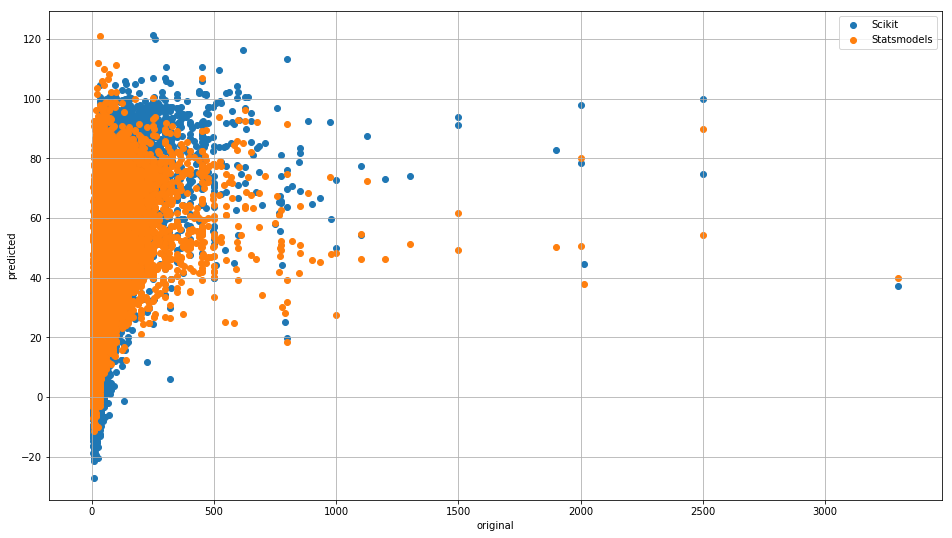

In [24]:
scatter( df.price, price1, label = "Scikit")
scatter(df.price, price2, label = "Statsmodels")
legend(loc="best")
grid()
xlabel('original')
ylabel('predicted');

In [25]:
df2 = pd.read_csv('winemag-data-130k-v2.csv.gz', )

### C)

In [26]:
f = [((i-j)/i,k) for i, j,k in zip(df.price, price1, df.index)]
print(f'The most overpriced model is the  {max(f)}')
print(f'The best value model is the  {min(f)}')

The most overpriced model is the  (4.146927924417279, 34501)
The best value model is the  (-5.58753838060511, 10209)


In [27]:
print('overpr: '+df2.description[max(f)[1]])
print('bestv:' +df2.description[min(f)[1]])

overpr: Neutral aromas, sour apple and citrus flavors, a spritzy mouthfeel and soda-like on the finish. Unsophisticated to a fault.
bestv:One of the first 1999 Cabs on the market, this wine smells and tastes like the grapes were crushed yesterday. This is what middleweight Cabernet Sauvignon sans oak tastes like: all fresh blackberries and cherries, with undercurrants of espresso and sweet spice. A remarkably tasty wine that should be easy to find: There were 65,000 cases produced.


### D) & E)

In [28]:
t= {i:j for i, j in zip(price1,df.index)}
min(t)

-27.012699482571804

In [29]:
print(f'they should pay me for drinking: {t[min(t) ]}' )
print("text: " + df2.description[t[min(t) ]])
print()
print(f'thebest: {t[max(t) ]}' )
print("text: " + df2.description[t[max(t) ]])

they should pay me for drinking: 103342
text: Confected and soapy with exuberant baby powder and floral tones, this dry, medium-bodied Bulgarian Muskat Ottonel is an uneven, craggy wine with shriekingly high acidity.

thebest: 89728
text: This latest incarnation of the famous brand is a superb wine. It is on par with, maybe even better than, the already legendary 2002. Its balance is impeccable: Apple and citrus flavors working with the tight minerality to give a textured yet fruity wine. Produced from Roederer's own vineyards which are mainly biodynamic, the wine has its own intense purity and crispness. It has amazing potential and is likely to age for many years. Drink from 2020.


# 4)

In [30]:
# https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
df['top20'] = 1- df[[i for i in df.columns if i[:3]=='cou']].sum(axis=1)

### A)

In [31]:
results_top = OLS(df.top20, df.drop("top20", axis = 1), hasconst = True).fit() 
r_top = LinearRegression().fit(df.drop('top20', axis = 1), df.top20)

In [32]:
results_top.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  top20   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.604e+04
Date:                Mon, 07 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:42:48   Log-Likelihood:             2.9362e+05
No. Observations:              129971   AIC:                        -5.871e+05
Df Residuals:                  129907   BIC:                        -5.865e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
points                           0.0107   1.13e-05    950.257      0.000       0.011       0.011
price                           -0.0002   1.93e-06    -99.253      0.000      -0.000      -0.000
carlen                          -0.0002   1.22e-06   -170.555      0.000      -0.000      -0.000
des_if                           0.0077      0.000     46.639      0.000       0.007       0.008
var_Bordeaux-style Red Blend     0.0016      0.000      3.424      0.001       0.001       0.003
var_Cabernet Sauvignon           0.0013      0.000      3.979      0.000       0.001       0.002
var_Chardonnay                   0.0002      0.000      0.654      0.513      -0.000       0.001
var_Malbec                      -0.0038      0.001     -6.445      0.000      -0.005      -0.003
var_Merlot                       0.0080      0.000     16.242      0.000       0.007       0.009
var_Nebbiolo                    -0.0119      0.001    -13.992      0.000      -0.014      -0.010
var_Pinot Gris                  -0.0021      0.001     -2.953      0.003      -0.004      -0.001
var_Pinot Noir                  -0.0027      0.000     -8.932      0.000      -0.003      -0.002
var_Portuguese Red              -0.0062      0.001     -9.147      0.000      -0.008      -0.005
var_Red Blend                    0.0075      0.000     23.205      0.000       0.007       0.008
var_Rhône-style Red Blend        0.0017      0.001      2.337      0.019       0.000       0.003
var_Riesling                    -0.0046      0.000     -9.952      0.000      -0.006      -0.004
var_Rosé                         0.0135      0.001     26.546      0.000       0.013       0.015
var_Sangiovese                   0.0090      0.001     15.017      0.000       0.008       0.010
var_Sauvignon Blanc              0.0042      0.000     10.138      0.000       0.003       0.005
var_Sparkling Blend              0.0059      0.001     10.150      0.000       0.005       0.007
var_Syrah                       -0.0035      0.000     -8.088      0.000      -0.004      -0.003
var_Tempranillo                  0.0035      0.001      5.179      0.000       0.002       0.005
var_White Blend                  0.0131      0.001     24.108      0.000       0.012       0.014
var_Zinfandel                    0.0061      0.001     11.401      0.000       0.005       0.007
cou_Argentina                   -0.8699      0.001   -620.600      0.000      -0.873      -0.867
cou_Australia                   -0.8898      0.001   -741.776      0.000      -0.892      -0.887
cou_Austria                     -0.9105      0.001   -902.690      0.000      -0.912      -0.908
cou_Bulgaria                    -0.9004      0.002   -389.663      0.000      -0.905      -0.896
cou_Canada                      -0.9016      0.002   -496.335      0.000    

In [33]:
r_top.coef_

array([ 4.03180916e-17, -1.42301535e-19,  0.00000000e+00,  2.56739074e-16,
        9.71445147e-17,  2.28983499e-16, -5.34294831e-16,  7.63278329e-16,
       -9.71445147e-16, -1.50573998e-15, -1.03389519e-15,  4.94396191e-16,
        2.11289319e-15,  4.51028104e-17, -4.71844785e-16, -5.78530279e-16,
        1.18828558e-16, -7.45931095e-16, -4.92661467e-16,  5.16080234e-17,
       -1.31318567e-15, -1.11867980e-15, -8.60422844e-16,  2.58040117e-15,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        4.79651041e-16, -4.31946146e-16,  1.60461922e-16,  4.87457297e-16,
        2.42861287e-17, -3.29597460e-17, -6.24500451e-17,  1.38777878e-16,
       -4.02455846e-16,  

### B) & C)

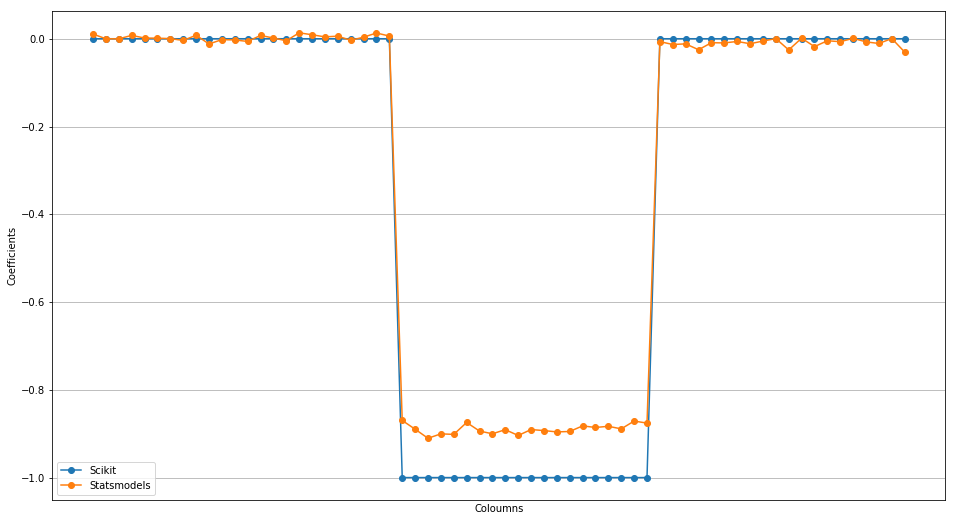

In [34]:
figsize(16,9)
plot(r_top.coef_, 'o-', label = 'Scikit')
grid()
plot(results_top.params, 'o-',  label = 'Statsmodels')
xlabel("Coloumns")
ylabel('Coefficients')
legend(loc= 'best')
xticks([]);

Here, all the coefficients are mainly driven by the countries, for all. Since I always had a difference in the models, and here it is smaller, 